In [2]:
import numpy as np

In [8]:
r = np.linspace(1, 10, 21)
print(r)
print(len(r))

[ 1.    1.45  1.9   2.35  2.8   3.25  3.7   4.15  4.6   5.05  5.5   5.95
  6.4   6.85  7.3   7.75  8.2   8.65  9.1   9.55 10.  ]
21


In [9]:
import matplotlib.pyplot as plt

In [10]:
def solver(I, w, dt, T):
    """
    Solve u’’ + w**2*u = 0 for t in (0,T], u(0)=I and u’(0)=0,
    by a central finite difference method with time step dt.
    """
    dt = float(dt)
    Nt = int(round(T/dt))
    u = np.zeros(Nt+1)
    t = np.linspace(0, Nt*dt, Nt+1)
    u[0] = I
    u[1] = u[0] - 0.5*dt**2*w**2*u[0]
    for n in range(1, Nt):
        u[n+1] = 2*u[n] - u[n-1] - dt**2*w**2*u[n]
    return u, t

In [26]:
def u_exact(t, I, w):
    return I*np.cos(w*t)

In [21]:
u, t = solver(1, 2*np.pi, 0.1, 1)
print(len(u))
print(len(t))
print(u)
print(t)

11
11
[ 1.          0.80260791  0.28835892 -0.33972961 -0.83369827 -0.99853604
 -0.76916758 -0.23614394  0.3901056   0.86234762  0.99414844]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [25]:
def visualize(u, t, I, w):
    plt.plot(t, u, 'r--o')
    t_fine = np.linspace(0, t[-1], 1001) # very fine mesh for u_e
    u_e = u_exact(t_fine, I, w)
    plt.plot(t_fine, u_e, 'b-')
    plt.legend(['numerical', 'exact'], loc='upper left')
    plt.xlabel('t')
    plt.ylabel('u')
    dt = t[1] - t[0]
    plt.title('dt=%g' % dt)
    umin = 1.2*u.min(); umax = -umin
    plt.axis([t[0], t[-1], umin, umax])

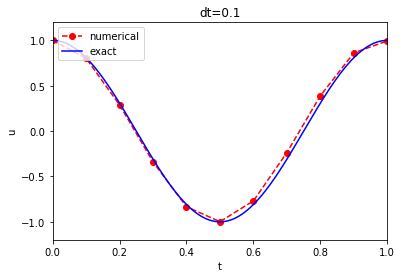

In [27]:
visualize(u, t, 1, 2*np.pi)